In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# to be used for Chi-Square and Cramer's V tests
from scipy.stats import chi2_contingency



In [43]:

train_raw = pd.read_csv(os.path.join(os.pardir,"data","train.csv"))
test = pd.read_csv(os.path.join(os.pardir,"data","test.csv"))

# Create a pre-process copy of the train dataset
train = train_raw.copy()

# Quick look at data
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Checking for Null or Blank columns
train.isnull().sum()
train.duplicated().sum()
(train.isnull() | (train == '')).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

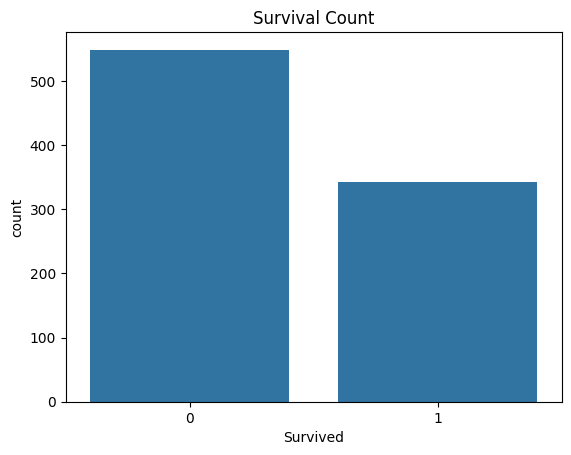

In [4]:
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()

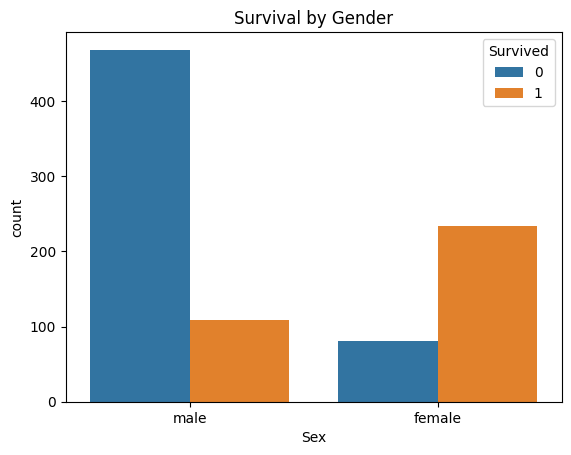

In [5]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.show()

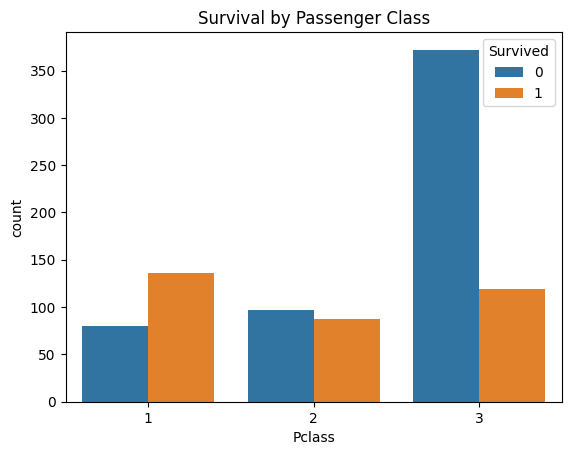

In [6]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

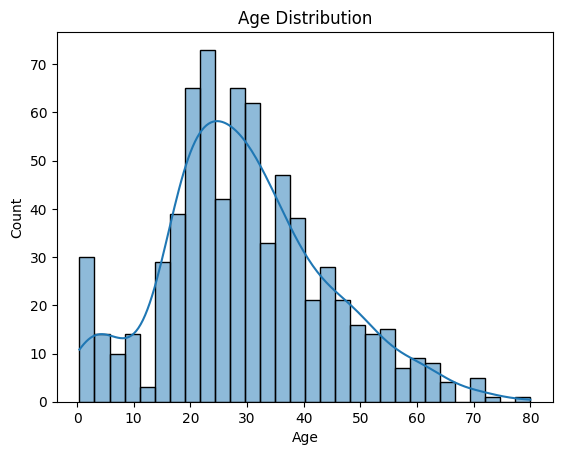

In [7]:
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

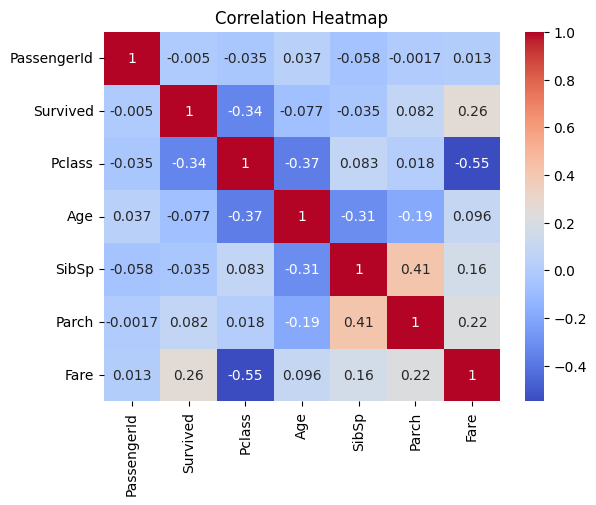

In [8]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Exploring the PClass

PClass is a categorical data
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

/var/folders/1v/yp3pf2fd283b189f253c28m40000gn/T/ipykernel_1832/1771674447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


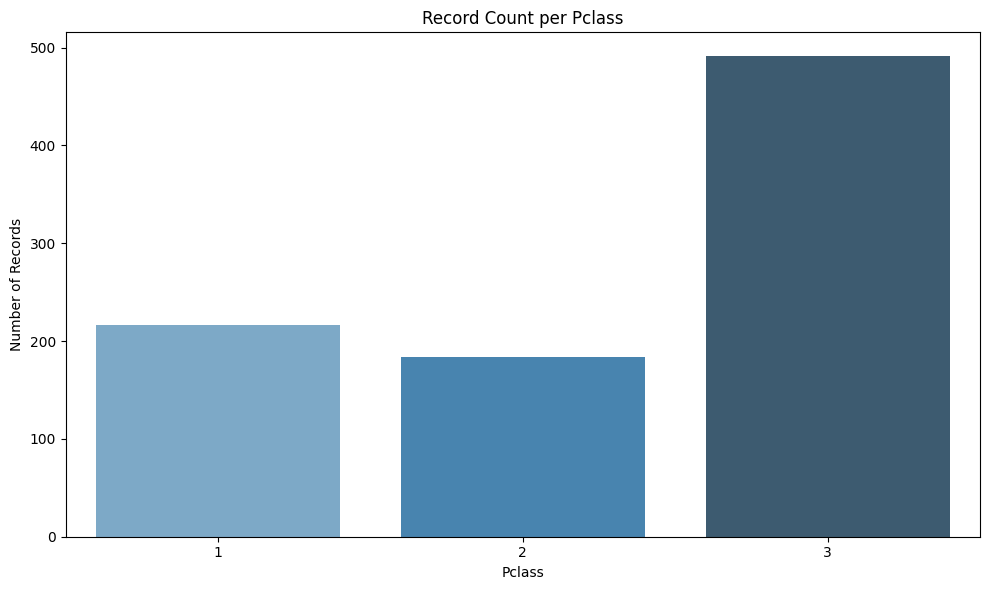

In [ ]:
group_by_pclass = train.groupby('Pclass').size().reset_index(name='number_of_records')

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(
    data=group_by_pclass,
    x='Pclass',
    y='number_of_records',
    palette='Blues_d'
)

# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Number of Records')
plt.title('Record Count per Pclass')
plt.tight_layout()

# Show plot
plt.show()

Since the PClass are categorical and only represented as a numeric, we will be applying Dummy Encoding.

In [ ]:
pclass_dummy = pd.get_dummies(train['Pclass'], prefix='Pclass', drop_first=True).astype(int)
train = pd.concat([train,pclass_dummy],axis=1)

In [ ]:
train.head()
#pd.get_dummies(train_pre_processed['Pclass'], prefix='Pclass', drop_first=True).astype(int)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


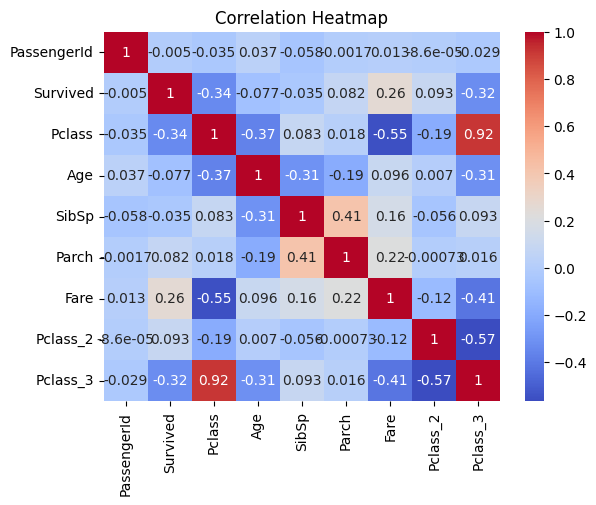

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.093349,-0.322308
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.188432,0.916673
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.006954,-0.312271
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.055932,0.092548
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.000734,0.015790
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.118557,-0.413333
Pclass_2,-0.000086,0.093349,-0.188432,0.006954,-0.055932,-0.000734,-0.118557,1.000000,-0.565210
Pclass_3,-0.029486,-0.322308,0.916673,-0.312271,0.092548,0.015790,-0.413333,-0.565210,1.000000


In [ ]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

train.corr(numeric_only=True)

In [ ]:
train.groupby(['Pclass_2','Pclass_3']).size().reset_index(name='number_of_records')

,Pclass_2,Pclass_3,number_of_records
0,0,0,216
1,0,1,491
2,1,0,184


## Perform Chi-Square and Cramer's V test

### Why Chi-Square Test?

Purpose:
	- The Chi-Square test of independence is used to determine if there’s a statistically significant association between two categorical variables.
	- It essentially helps answer the question:
“Does the survival outcome significantly depend on passenger class?”

Intuition:
	- It compares the observed frequencies (how many people survived or didn’t survive in each class) with the expected frequencies (what you’d expect to see if there was no relationship between class and survival).
	- A significant Chi-Square statistic indicates a clear difference between observed and expected counts, implying dependence between variables.

#### Chi-Square interpretation

To check if there is a relationship

| Output | Meaning |
|--------|---------|
| p < 0.05 | Statistically significant relationship -> the variables are associated |
| p >= 0.05 | No strong evidence of association -> the variables may be independent |

### Why Cramer’s V?

Purpose:
	- While Chi-Square test only tells you whether there’s an association (yes/no), it does not quantify how strong that relationship is.
	- Cramer’s V solves this by providing a measure of strength of association between categorical variables, especially useful when categories exceed two.

Intuition:
	- Cramer’s V value ranges from 0 to 1:
	- 0 indicates no relationship.
	- Values closer to 1 indicate a strong relationship.

#### Cramer's V interpretation

To measure how strong that relationship is

| Cramer's V | Association Strength |
|---------------|----------------------|
| 0.00 -> 0.10 | Negligible |
| 0.10 -> 0.20 | Weak |
| 0.20 -> 0.40 | Moderate |
| 0.40 -> 0.60 | Strong |
| 0.60 -> 0.80 | Very Strong |
| 0.80 -> 1.00 | Near-perfect |




In [15]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  # Bias correction
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def chi_sqr_test(x, y):
    # Create contingency table
    confusion_matrix = pd.crosstab(x, y)
    # Run the test
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    return chi2, p, dof, expected

In [16]:
# Create contingency table
table = pd.crosstab(train['Pclass'], train['Survived'])

# Run the test
#chi2, p, dof, expected = chi2_contingency(table)

chi2, p, dof, expected = chi_sqr_test(train['Pclass'], train['Survived'])

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 102.88898875696056
p-value: 4.549251711298793e-23


In [17]:
v = cramers_v(train['Pclass'], train['Survived'])
print(f"Cramér’s V (Pclass vs Survived): {v:.3f}")

Cramér’s V (Pclass vs Survived): 0.337


### Result for PClass and Survived

| Test | Result | Interpretation |
|------|--------|----------------|
| Chi-Square | Statistic = 102.89, p-value ~ 4.5e-23 | Highly significant association between Pclass and Survived (not due to chance) |
| Cramer's V | 0.337 | Moderate association (fairly predictive) |


In [26]:
# Get all categorical columns
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()

# Add any numeric categorical features manually
#print(categorical_columns)
#print(list(set(train.columns.tolist()) - set(categorical_columns)))
categorical_columns += ['Pclass']

# Remove the Name field
categorical_columns.remove('Name')

# Calculate Cramér's V for each vs Survived
results = []

for col in categorical_columns:
    try:
        # Create contingency table
        confusion_matrix = pd.crosstab(train[col], train['Survived'])
        # Run the Chi-Squared test
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)

        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  # Bias correction
        rcorr = r - ((r - 1)**2) / (n - 1)
        kcorr = k - ((k - 1)**2) / (n - 1)
        cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

        results.append((col, chi2, p, round(cramers_v, 3)))
        

    except:
        results.append((col, 'Error', 'Error', 'Error'))

# Create and sort results table ---
results_df = pd.DataFrame(results, columns=['Feature', "Chi-Square Statistic", "Chi-Square p-value", "Cramer's V"])
#results_df = results_df.sort_values(by="Feature", ascending=True)

print(results_df)

    Feature  Chi-Square Statistic  Chi-Square p-value  Cramer's V
0       Sex            260.717020        1.197357e-58       0.540
1    Ticket            766.569703        1.152730e-02       0.311
2     Cabin            161.250000        1.835735e-01       0.268
3  Embarked             26.489150        1.769922e-06       0.166
4    Pclass            102.888989        4.549252e-23       0.337


|  Feature  |  Chi-Square Statistic  |  Chi-Square p-value  |  Cramer's V  |  Significance  |  Strength of Relationship  |
|-----------|------------------------|----------------------|--------------|----------------|----------------------------|
|  Sex  |  260.717020  |  1.197357e-58  |  0.540  |  ✅ Highly Significant  |  Strong  |
|  Ticket  |  766.569703  |  1.152730e-02  |  0.311  |  ✅ Significant  |  Moderate  |
|  Cabin  |  161.250000  |  1.835735e-01  |  0.268  |  Not Significant  |  Weak/Moderate  |
|  Embarked  |  26.489150  |  1.769922e-06  |  0.166  |  ✅ Highly Significant  |  Week but notable  |
|  Pclass  |  102.888989  |  4.549252e-23  |  0.337  |  ✅ Highly Significant  |  Moderate  |

#### Sex
- Chi-Square p-value: Extremely small; definitely significant.
- Cramer’s V: 0.540 indicating a very strong relationship.
- Interpretation: Gender is clearly one of the strongest predictors for survival.
- Action: ✅ Definitely retain and prioritize for modeling.

#### Ticket
- Chi-Square p-value: 0.01153; statistically significant.
- Cramer’s V: 0.311 indicates moderate strength.
- Interpretation: Ticket number shows moderate association, but caution needed—Ticket may have high cardinality (many unique values), complicating modeling.
- Action: ⚠️ Consider extracting meaningful info from ticket (e.g., ticket prefix) or otherwise simplify. If too complex, you might exclude this field or simplify its representation.

#### Cabin
- Chi-Square p-value: 0.1836; not statistically significant.
- Cramer’s V: 0.268 suggests a weak/moderate association but it’s not statistically supported.
- Interpretation: Cabin has a lot of missing data, too many unique values, and weak statistical relevance.
- Action: ❌ Likely candidate for dropping or significant simplification (e.g., extract cabin-deck letter A, B, C etc., and re-check significance).

#### Embarked
- Chi-Square p-value: 1.77e-06; highly significant.
- Cramer’s V: 0.166 suggests weak but meaningful association.
- Interpretation: Port of embarkation slightly impacts survival odds.
- Action: ✅ Retain in modeling, since it’s statistically significant, but keep expectations modest about predictive power.

#### Pclass
- Chi-Square p-value: 4.55e-23; highly significant.
- Cramer’s V: 0.337 indicating a moderate but clear association.
- Interpretation: Passenger class is a crucial predictor of survival.
- Action: ✅ Strongly retain and use directly in modeling.


/var/folders/1v/yp3pf2fd283b189f253c28m40000gn/T/ipykernel_1832/2565842017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Cramer's V", y="Feature", palette="Blues_d")


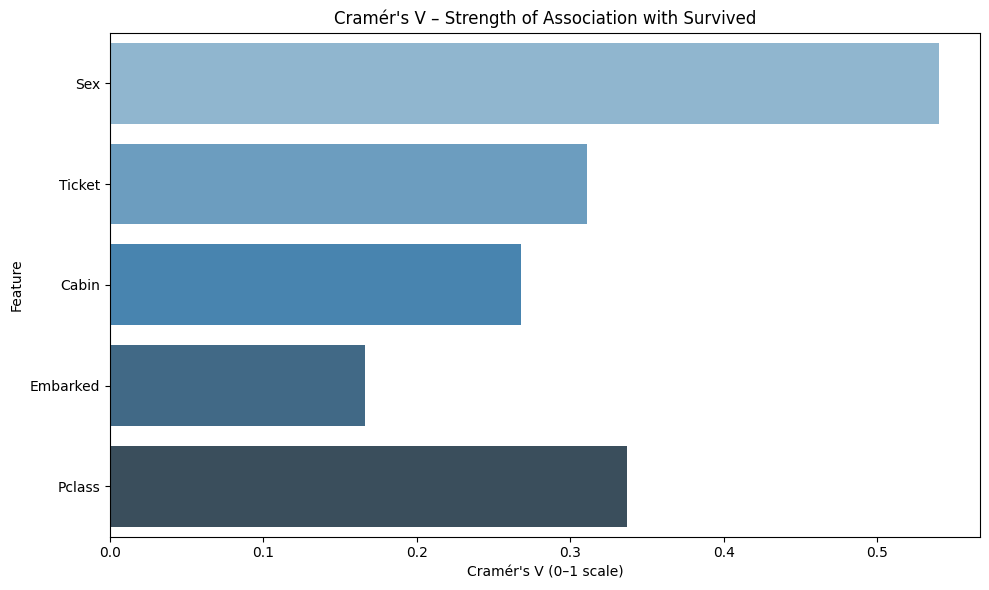

In [24]:
# Bar plot of Cramér's V
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Cramer's V", y="Feature", palette="Blues_d")
plt.title("Cramér's V – Strength of Association with Survived")
plt.xlabel("Cramér's V (0–1 scale)")
plt.tight_layout()
plt.show()

## Explore Numeric Fields

#### Step 1: Check for NULL/Blank values

In [44]:
train[['Age', 'Fare', 'SibSp', 'Parch']].isnull().sum()


Age      177
Fare       0
SibSp      0
Parch      0
dtype: int64

#### Interpratation for Step 1

- Age has 177 missing values. That’s a substantial portion and needs addressing clearly before modeling.
- Fare, SibSp, and Parch have no missing values. No immediate cleaning needed here.
    
#### Perform cleaning for Age

- Assign a dummy data for Age.
- In this activity, we will assign the median value based on Sex/Gender

In [ ]:
# Check if Age is a whole number or has decimals

decimal_count = (train_raw['Age'] % 1 != 0).sum()
print(f"There are {decimal_count} Age values with decimals.")

# Apply dummy median value on missing age
train['Age'] = train.groupby(['Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

# Rerun the check
train[['Age', 'Fare', 'SibSp', 'Parch']].isnull().sum()

There are 202 Age values with decimals.
Age      0
Fare     0
SibSp    0
Parch    0
dtype: int64


#### Interpretaion
- No more blank values for Age

#### Step 1: Describe the dataset

In [47]:
train[['Age', 'Fare', 'SibSp', 'Parch']].describe()

,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.441268,32.204208,0.523008,0.381594
std,13.018747,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000
50%,29.000000,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000



#### Interpratation for Step 1

- Age
    - Cleaned successfully.
    - Mean ≈ Median → Distribution is likely close to normal (but we’ll confirm this in Step 2).
    - Range from infant (0.42) to elderly (80) → large age spread.
- Fare
    - Large gap between mean and median (32.2 vs. 14.45).
    - Std dev (49.69) is even larger than the mean → strong indicator of outliers and skew.
    - Needs transformation consideration later (log scale maybe).
- SibSp & Parch
    - Very low median, meaning most people traveled alone (0).
    - Max values (8 & 6) may be extreme cases → likely outliers.
    - May benefit from binning or combining into one feature later (FamilySize).

#### Step 2: Visualizing Distributions



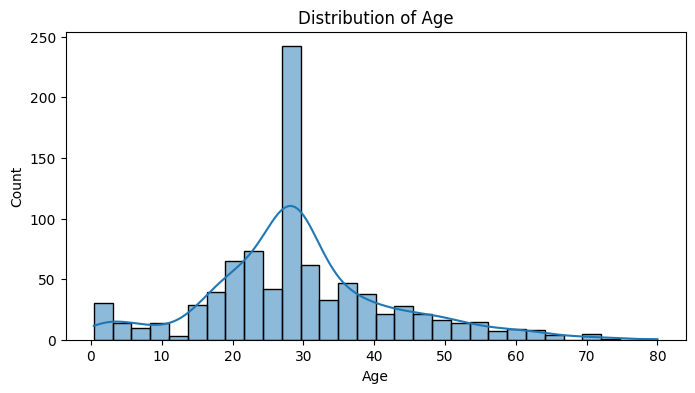

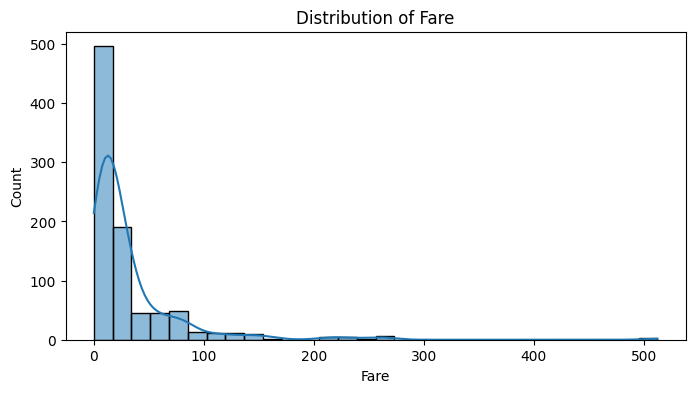

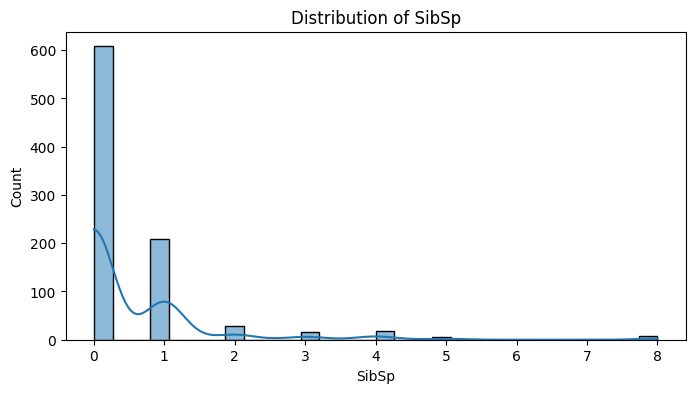

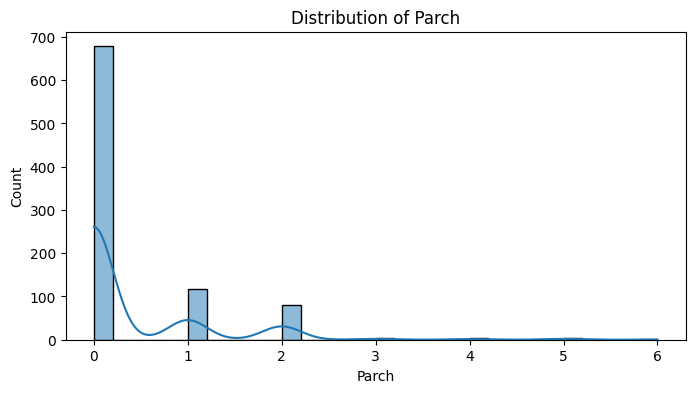

In [49]:
num_features = ['Age', 'Fare', 'SibSp', 'Parch']

for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(train[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Interpratation for Step 2

##### Age
- Histogram + KDE:
    - The distribution is approximately normal but with a sharp spike at ~29 (from median imputation).
    - Slight right skew (tail to the right).
    - Clear peak where missing values were filled.

- Boxplot:
    - Mild outliers observed above ~60 and below age 5.
    - No extreme anomalies — this looks acceptable.

- Recommendation:
    - Keep Age as is.
    - If you want to reduce the spike, consider modeling missing values using group-wise medians in future projects (e.g., by Sex and Pclass).
    - No log transform needed. Outliers can be left as-is for now unless model sensitivity is an issue.

##### Fare

- Histogram + KDE:
    - Heavily right-skewed — most values under 50, but some fares go as high as 512.
    - Clear long tail (extreme outliers).

- Boxplot:
    - Many strong outliers.
    - Huge spread — the max value is far from the median.

- Recommendation:
    - Consider applying a log transformation to normalize distribution
    - This helps many ML models (especially linear/logistic regression) perform better.
    - Don’t drop outliers yet — they may be valuable (VIP passengers, luxury cabins).

##### 

#### Step 3: Correlation Analysis

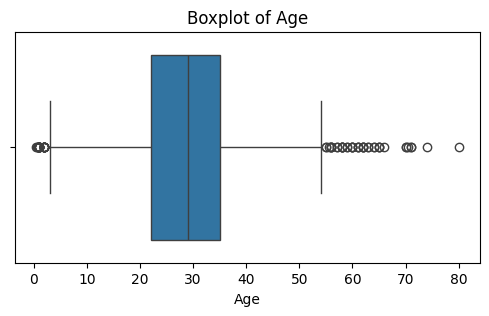

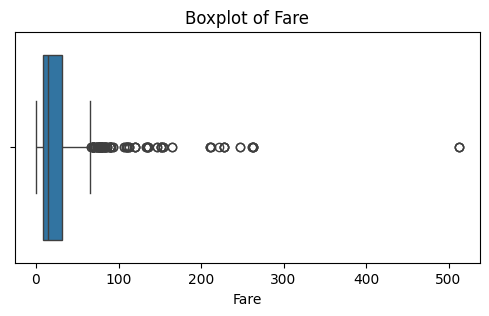

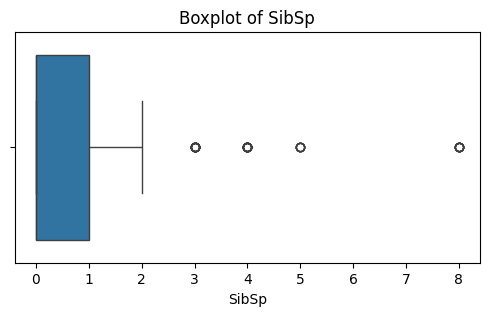

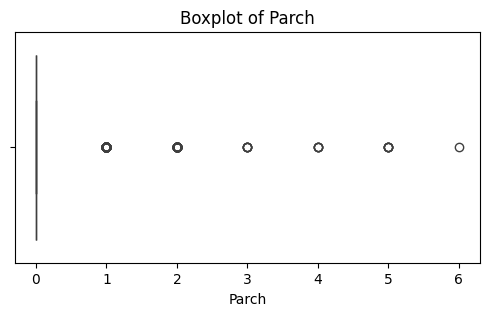

In [50]:
for feature in num_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

#### Interpratation for Step 3

- Age has 177 missing values. That’s a substantial portion and needs addressing clearly before modeling.
- Fare, SibSp, and Parch have no missing values. No immediate cleaning needed here.

#### Step 4: Correlation Analysis

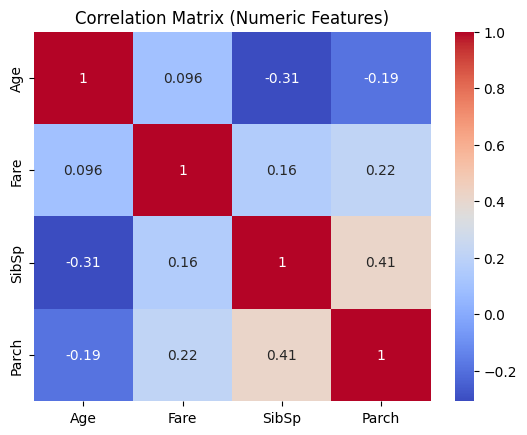

In [35]:
corr_matrix = train[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

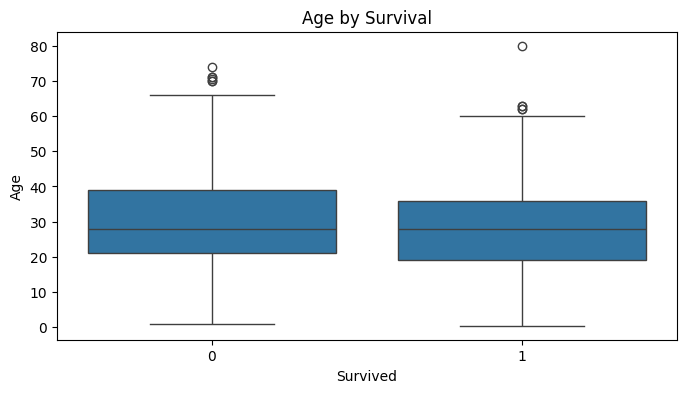

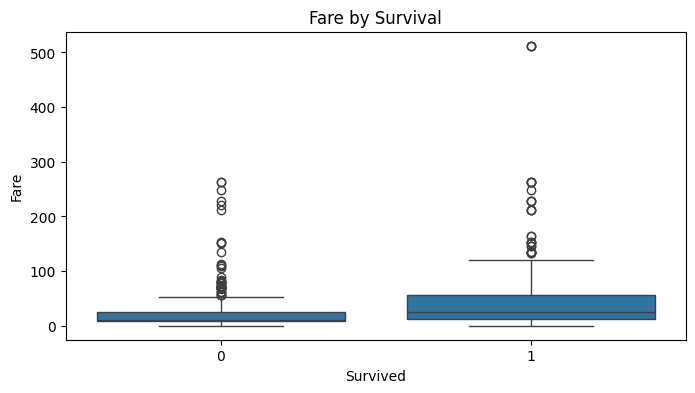

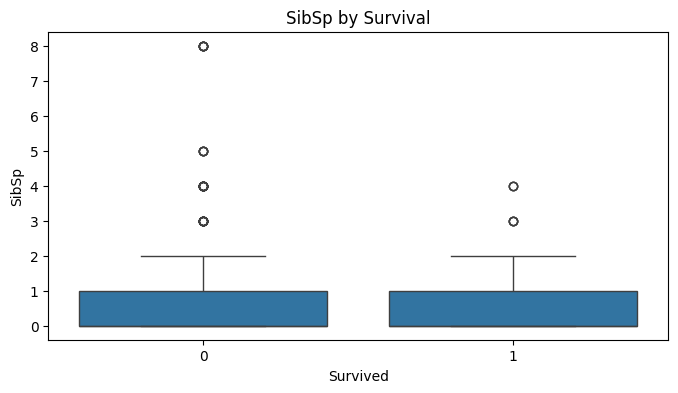

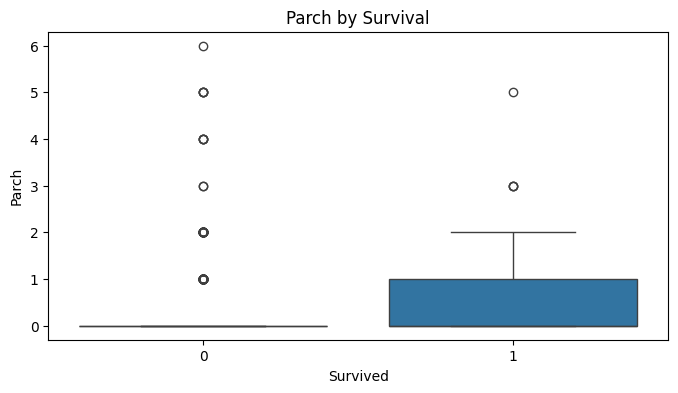

In [36]:
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Survived', y=feature, data=train)
    plt.title(f'{feature} by Survival')
    plt.show()

In [37]:
from scipy.stats import pointbiserialr

for feature in num_features:
    clean_df = train[[feature, 'Survived']].dropna()
    corr, pval = pointbiserialr(clean_df[feature], clean_df['Survived'])
    print(f'{feature} correlation with Survival: correlation={corr:.4f}, p-value={pval:.4f}')

Age correlation with Survival: correlation=-0.0772, p-value=0.0391
Fare correlation with Survival: correlation=0.2573, p-value=0.0000
SibSp correlation with Survival: correlation=-0.0353, p-value=0.2922
Parch correlation with Survival: correlation=0.0816, p-value=0.0148


## Perform Mutual Information

### Mutual Information

Mutual Information helps select the best features for modeling.

#### Intuition:
- Mutual Information measures how much information one variable provides about another.
- Unlike correlation (linear relationships only), MI can detect non-linear relationships as well.
- MI = 0 → Variables are completely independent.
- Higher MI → Stronger relationship or dependency.

#### Why use Mutual Information?
- To identify important features, especially when relationships are complex.
- Useful for both categorical and numerical features.
- Works very well with categorical data.

#### Interpretation:
- Look for high-scoring features.
- Prioritize features with higher MI scores when selecting features for your ML model.



In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Sample Data (assuming df is your Titanic dataframe)
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Ticket', ]
X_cat = pd.get_dummies(train[categorical_features], drop_first=True)
y = train['Survived']

# Compute Mutual Information
mi_scores = mutual_info_classif(X_cat, y, discrete_features=True)

# Organize results into a DataFrame
mi_df = pd.DataFrame({
    'Feature': X_cat.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

print(mi_df)

      Feature  Mutual Information
1    Sex_male            0.150870
0      Pclass            0.058107
3  Embarked_S            0.011925
2  Embarked_Q            0.000007


#### Interpretation of Mutual Information Results

- Sex_male (MI = 0.151):
    - Clearly the strongest categorical predictor.
    - Indicates “Sex” carries the highest information about survival.
- Pclass (MI = 0.058):
    - Moderate, meaningful, but weaker compared to Sex.
    - Still important enough to keep.
- Embarked_S (MI = 0.012):
    - Very low, providing minimal information.
    - Marginally useful, consider testing carefully in modeling.
- Embarked_Q (MI ~ 0):
    - Practically provides no additional information.
    - Likely a candidate to ignore or drop.

#### Recommended actions from Mutual Information:
- Retain: Sex, Pclass
- Consider dropping or test carefully: Embarked (particularly Embarked_Q)

## Perform Cross Validation

### Cross Validation

Cross-validation evaluates your model’s general performance reliably.

#### Intuition:
- Cross-validation splits your data into several parts (“folds”).
- You train and test your model multiple times on different subsets.
- This helps you reliably evaluate model performance, reducing bias and overfitting.

#### Interpretation:
- Look at the average accuracy (higher is better).
- Consistency across folds is ideal (scores shouldn’t vary widely).
- Helps verify if categorical features are strong predictors.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Prepare your data (categorical features from before)
X_cat = pd.get_dummies(train[['Sex', 'Embarked', 'Pclass']], drop_first=True)
y = train['Survived']

# Simple Logistic Regression Model
model = LogisticRegression(max_iter=200)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_cat, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.76536313 0.78651685 0.76966292 0.75280899 0.78651685]
Average accuracy: 0.7721737492938296


#### Interpretation of Cross-Validation Results

- Average accuracy across the 5-fold cross-validation is about 77.2%.
- Individual fold scores are consistent (ranging approximately from 75.3% to 78.7%), indicating the model is fairly stable and not overly sensitive to different splits.
- An accuracy of ~77% using only categorical features is very decent as a starting baseline.

####  Actionable takeaways from Cross-Validation:
- Categorical features (Sex, Pclass, and possibly Embarked) have clear predictive power.
- A reliable baseline performance (~77%), which we'll try to improve later with numeric features, feature engineering, and hyperparameter tuning.

/var/folders/1v/yp3pf2fd283b189f253c28m40000gn/T/ipykernel_1832/913653824.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


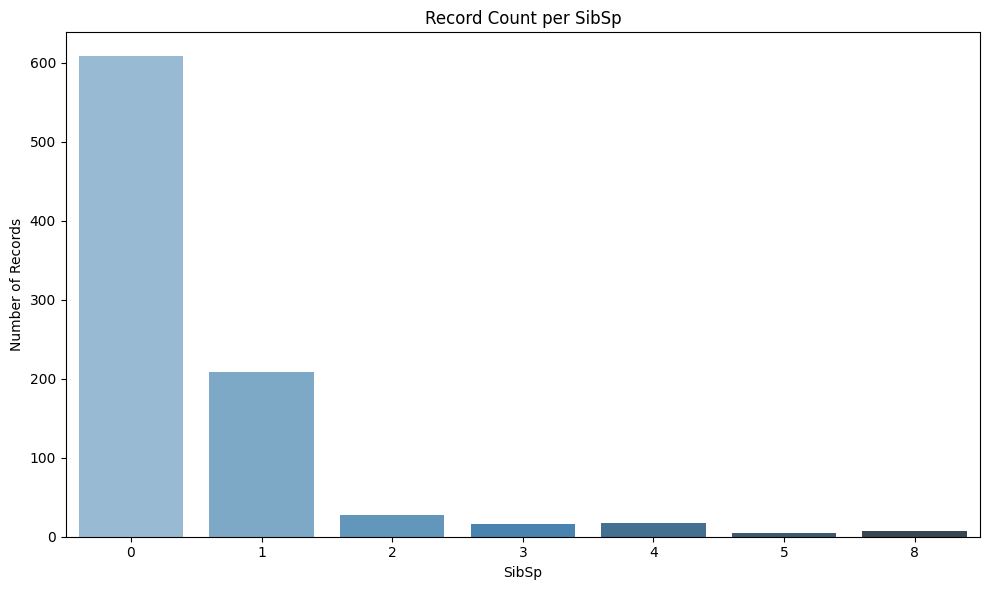

In [20]:
group_by_pclass = train.groupby('SibSp').size().reset_index(name='number_of_records')

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(
    data=group_by_pclass,
    x='SibSp',
    y='number_of_records',
    palette='Blues_d'
)

# Add labels and title
plt.xlabel('SibSp')
plt.ylabel('Number of Records')
plt.title('Record Count per SibSp')
plt.tight_layout()

# Show plot
plt.show()

/var/folders/1v/yp3pf2fd283b189f253c28m40000gn/T/ipykernel_1832/371459742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


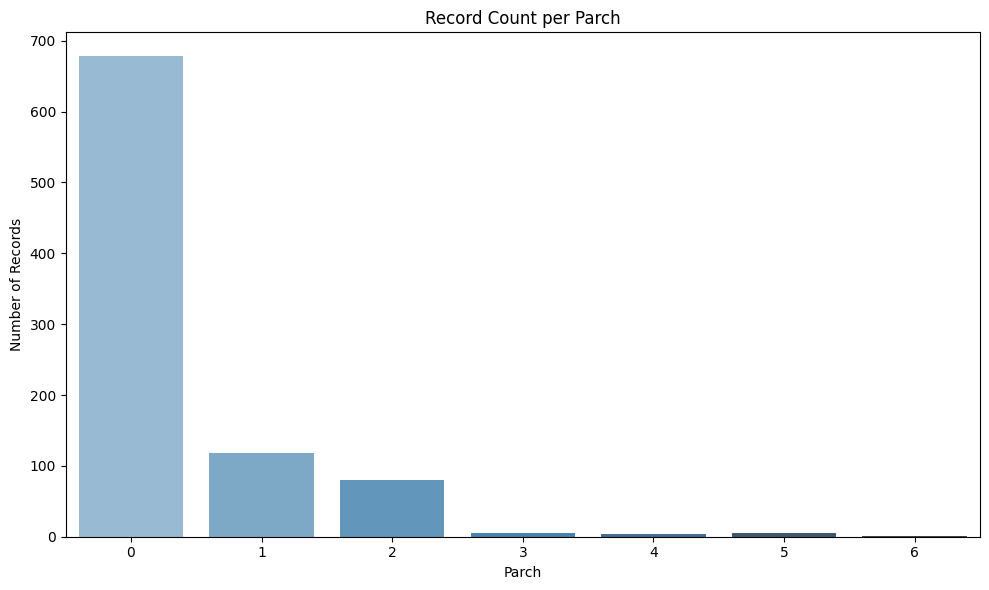

In [21]:
group_by_pclass = train.groupby('Parch').size().reset_index(name='number_of_records')

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(
    data=group_by_pclass,
    x='Parch',
    y='number_of_records',
    palette='Blues_d'
)

# Add labels and title
plt.xlabel('Parch')
plt.ylabel('Number of Records')
plt.title('Record Count per Parch')
plt.tight_layout()

# Show plot
plt.show()

/Users/ebixg/Documents/Development/evan-gloria/git_repo/titanic-survival-prediction/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


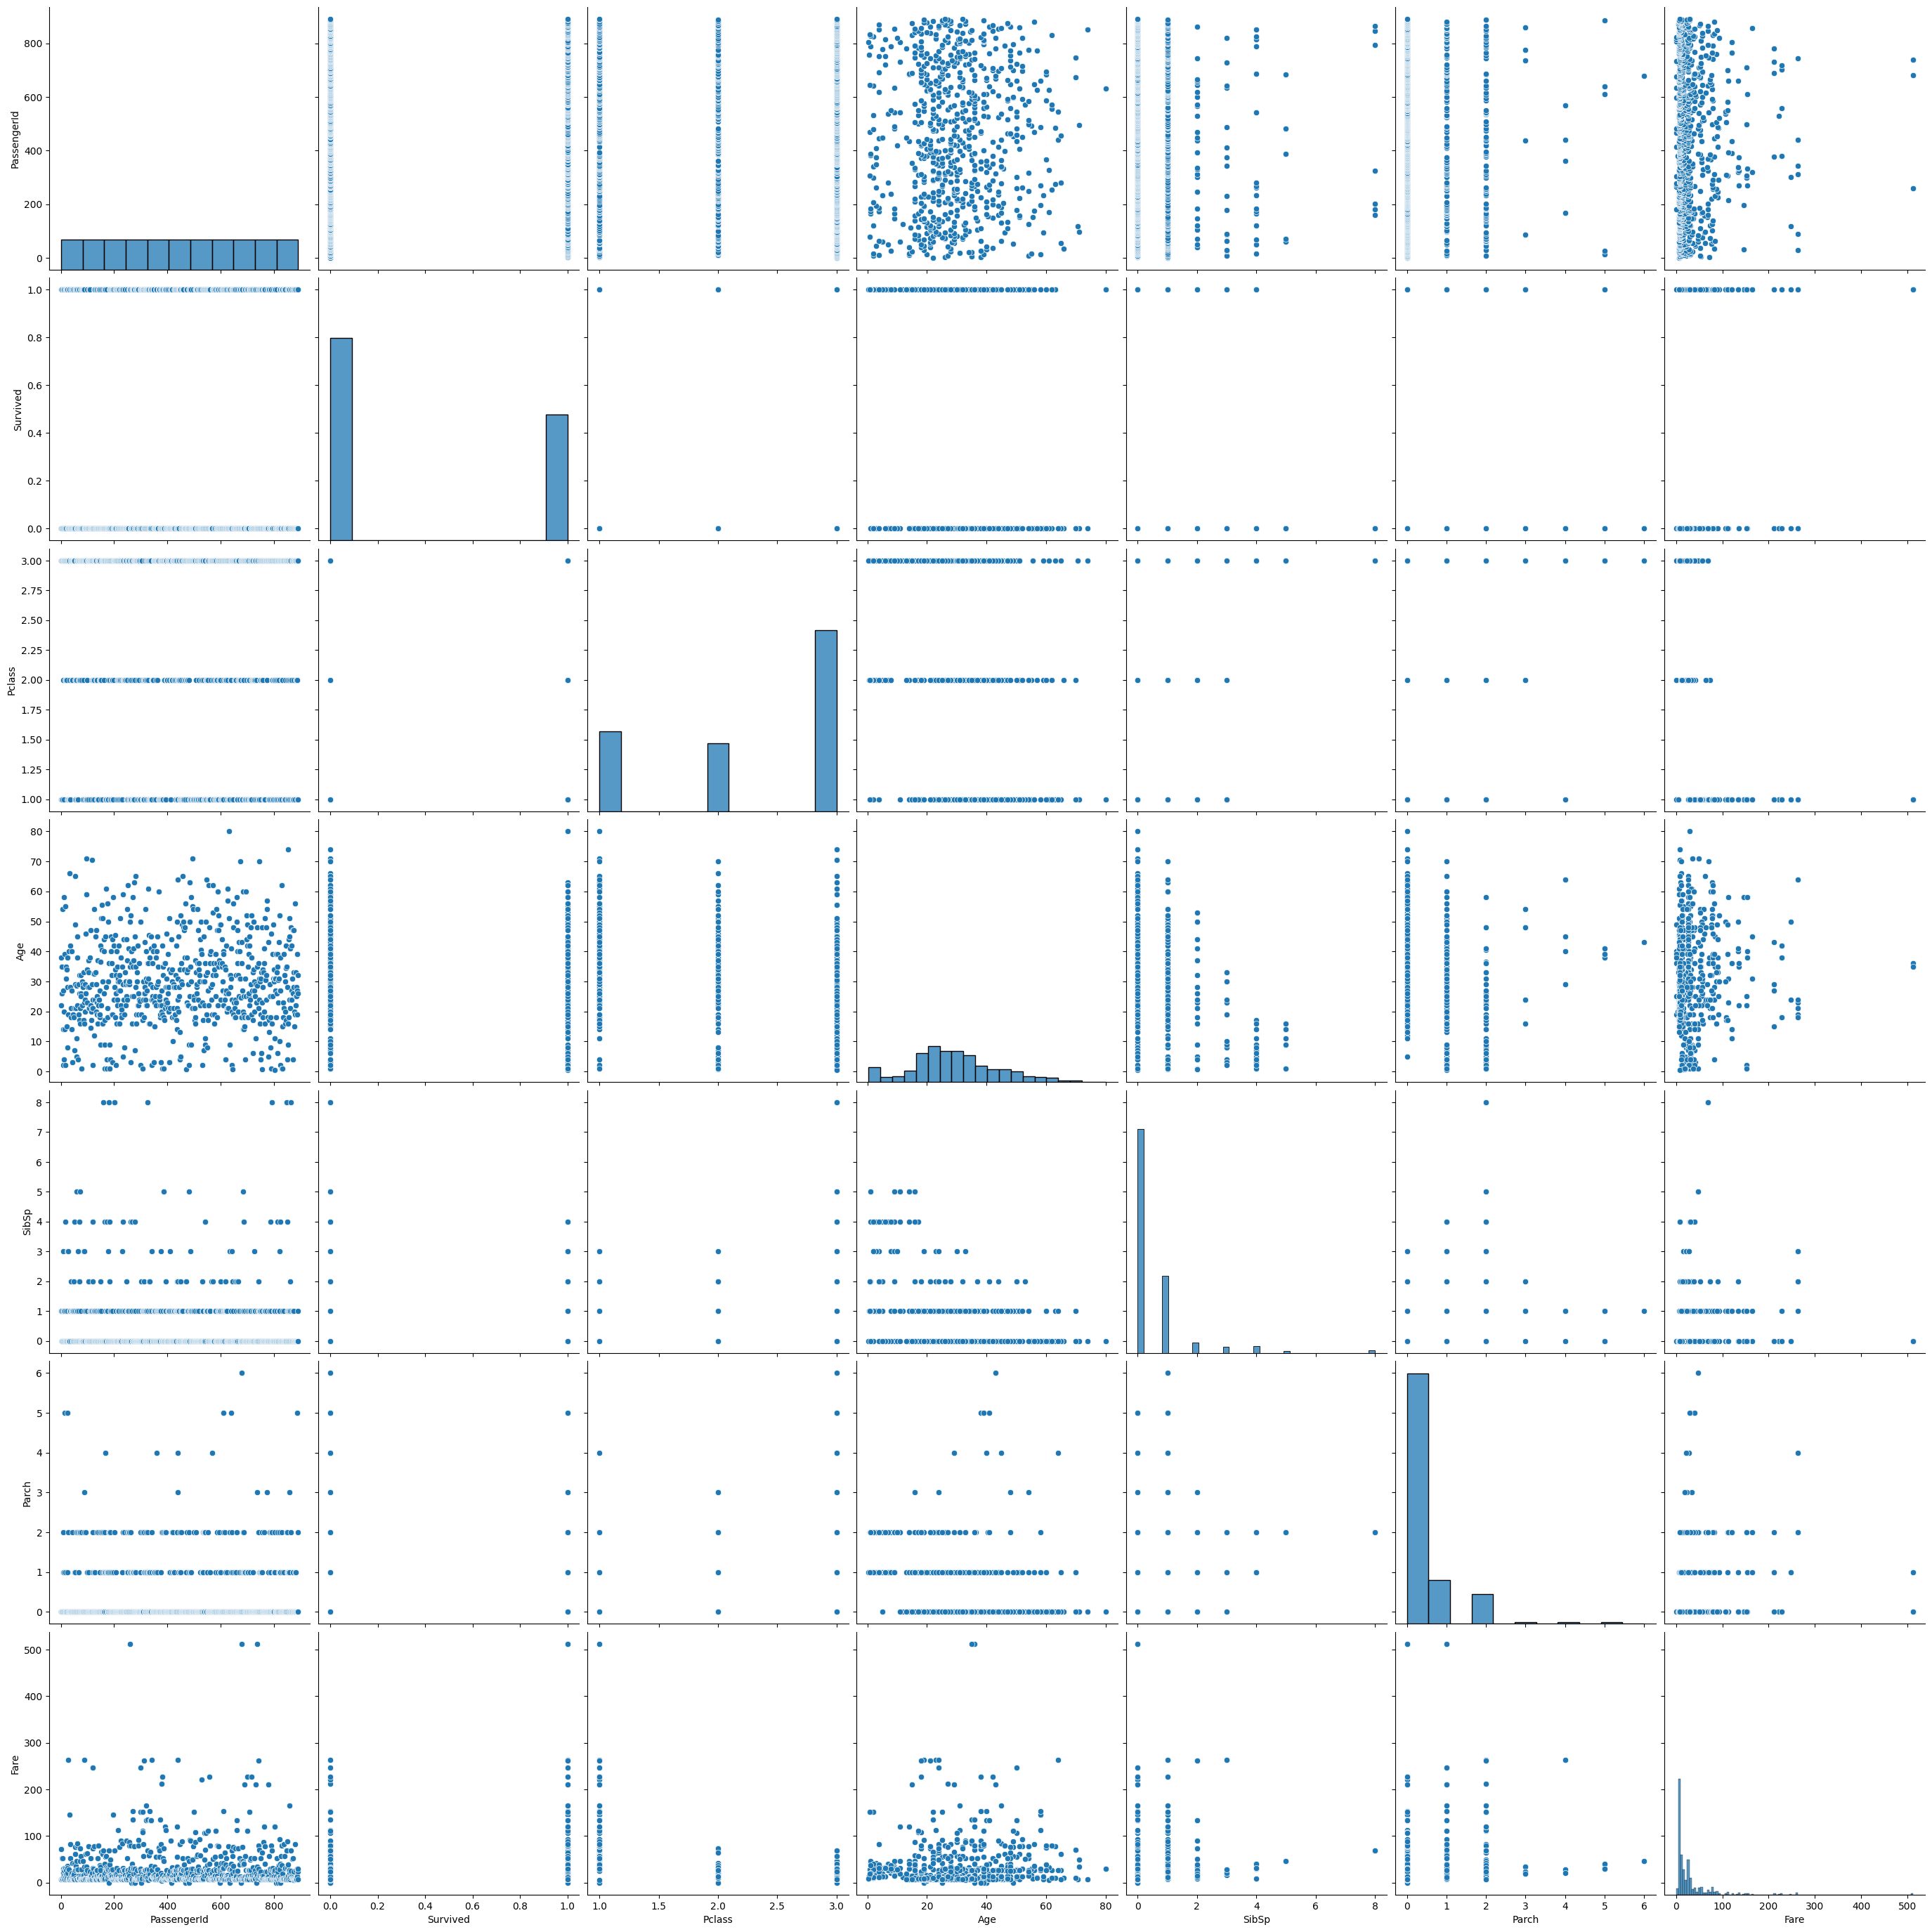

In [22]:
sns.pairplot(
    data=train
    ,size=4
)